In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_1/seeds/oracle.run2")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs
0,0.758333,0.639240,0.620417,1.155011,12.0,669.400113
1,0.776563,0.603976,0.628021,1.172066,16.0,943.089365
2,0.760417,0.671422,0.602500,1.233359,10.0,583.758944
3,0.770660,0.610240,0.622708,1.204355,12.0,684.243059
4,0.754514,0.638551,0.588646,1.232948,9.0,517.577868


In [3]:
m = all_trials[["source_val_label_accuracy", "target_val_label_accuracy"]].mean()
m

source_val_label_accuracy    0.764097
target_val_label_accuracy    0.612458
dtype: float64

In [4]:
s = all_trials[["source_val_label_accuracy", "target_val_label_accuracy"]].std()
s

source_val_label_accuracy    0.009180
target_val_label_accuracy    0.016407
dtype: float64

(0, 1)

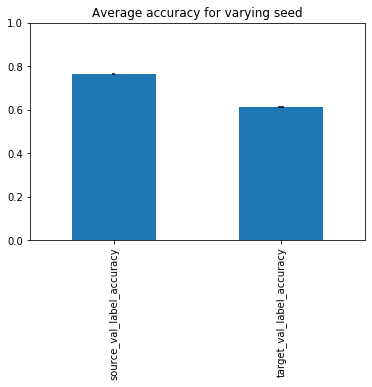

In [5]:
ax = m.plot(kind = "bar", y = "mean", legend = False, title = "Average accuracy for varying seed", xerr = s)
ax.set_ylim(0,1)

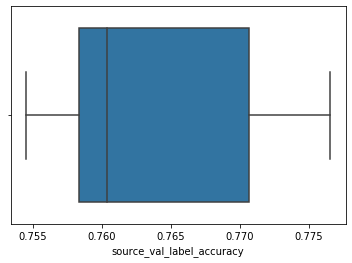

In [6]:
ax = sb.boxplot(x=all_trials["source_val_label_accuracy"])

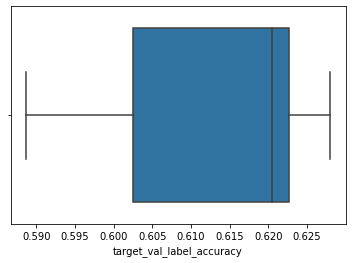

In [7]:
ax = sb.boxplot(x=all_trials["target_val_label_accuracy"])

### We conclude that varying the seed does not have a meaningful impact on accuracy

In [8]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_1/dataset_seeds/oracle.run2")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs
0,0.777951,0.599629,0.624896,1.105129,12.0,682.267753
1,0.752257,0.661629,0.602396,1.179875,10.0,580.359569
2,0.776563,0.613172,0.632812,1.154313,13.0,772.265159
3,0.770660,0.610240,0.622708,1.204355,12.0,697.481237
4,0.762153,0.621443,0.617917,1.179611,11.0,623.777776


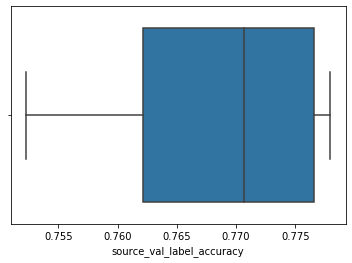

In [9]:
ax = sb.boxplot(x=all_trials["source_val_label_accuracy"])

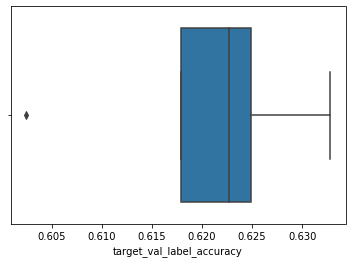

In [10]:
ax = sb.boxplot(x=all_trials["target_val_label_accuracy"])

### We conclude that varying the dataset_seed does not have a meaningful impact on accuracy